<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

# <font color='navy' size=6>Clustering with kNN</font>


In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
from pandas import DataFrame

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

# 1) Data

In [2]:
loans = np.array ([12400, 1500,
3400, 2000,
3900, 3000,
12000, 8000,
9500, 5000,
9800, 4000,
10000, 6900,
6300, 1000,
8300, 5000,
13000, 9500,
11700, 2800,
4000, 1400,
5000, 1200,
12500, 8900,
10400, 9000,
8300, 4000,
5000, 2000,
13300, 2560,
5300, 2300,
7000, 3000,
12400, 2000,
1000, 1500]).reshape(22, -1)
loans_df = DataFrame(loans)
loans_df.columns = ["montlhy_income", "monthly_expenses"]
loans_df["loan_type"] = [3, 4, 4, 1, 2, 2, 2, 4, 2, 1, 3, 4, 4, 1, 1, 2, 4, 3, 4, 4, 3, 4]
loans_df

    montlhy_income  monthly_expenses  loan_type
0            12400              1500          3
1             3400              2000          4
2             3900              3000          4
3            12000              8000          1
4             9500              5000          2
5             9800              4000          2
6            10000              6900          2
7             6300              1000          4
8             8300              5000          2
9            13000              9500          1
10           11700              2800          3
11            4000              1400          4
12            5000              1200          4
13           12500              8900          1
14           10400              9000          1
15            8300              4000          2
16            5000              2000          4
17           13300              2560          3
18            5300              2300          4
19            7000              3000    

In [34]:
type(loans_df)

pandas.core.frame.DataFrame

# 2) Data Visualization

/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Monthly Expenses')

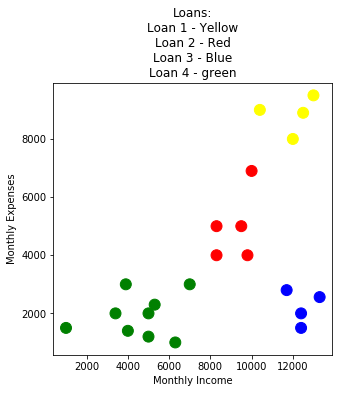

In [4]:
fig = plt.figure(figsize=(5,5))


colormap = np.array(['black', 'yellow', 'red', 'blue', 'green'])
 
plt.scatter(loans_df.montlhy_income, loans_df.monthly_expenses, 
            c = colormap[loans_df.loan_type], s = 120)
plt.title('Loans:\nLoan 1 - Yellow\nLoan 2 - Red\nLoan 3 - Blue\nLoan 4 - green')
ax = fig.add_subplot(111)
ax.set_xlabel('Monthly Income')
ax.set_ylabel('Monthly Expenses')

# 3) kNN Algorithm

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, 
                           p = 2)# p=2 for euclidean distance
knn.fit(loans_df[["montlhy_income", "monthly_expenses"]], 
        loans_df.loan_type)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# 4) Prediction Mesh

/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


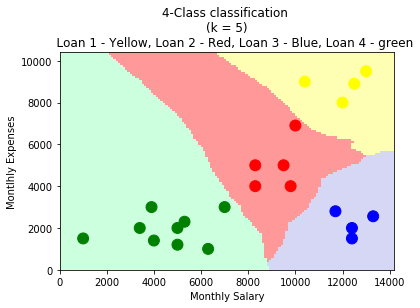

In [13]:
def plotMesh():
    h = 100 
    # Create color maps
    cmap_light = ListedColormap(['#ffffb3', '#ff9999','#d6d6f5','#ccffdd'])
    colormap = np.array(['black', 'yellow', 'red', 'blue', 'green'])

    x_min, x_max = loans_df.montlhy_income.min() - 1000, loans_df.montlhy_income.max() + 1000
    y_min, y_max = loans_df.monthly_expenses.min() - 1000, loans_df.monthly_expenses.max() + 1000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(loans_df.montlhy_income, loans_df.monthly_expenses, c = colormap[loans_df.loan_type], 
                s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)\n\
    Loan 1 - Yellow, Loan 2 - Red, Loan 3 - Blue, Loan 4 - green" % (5))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Monthly Salary')
    ax.set_ylabel('Montlhly Expenses')
plotMesh()

# 5) Prediction

In [14]:
len(loans_df)

22

Monthly Salary: 1233
Monthly Expenses: 2322
Prediction: Loan # 4 Green


/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


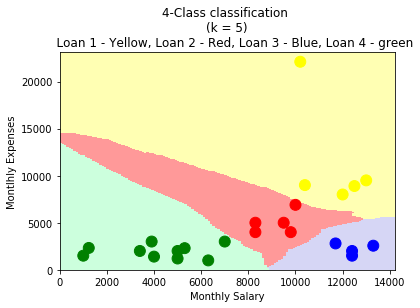

In [16]:
# make prediction
salary = int(input('Monthly Salary: '))
expenses = int(input('Monthly Expenses: '))
data_class = knn.predict(np.array([salary, expenses]).reshape(1, -1))[0]
class_name = ["N/A", "Yellow", "Red", "Blue", "Green"]

print('Prediction: Loan #', data_class, class_name[data_class])
    
loans_df.loc[len(loans_df)]=[salary, expenses, data_class]
knn.fit(loans_df[["montlhy_income", "monthly_expenses"]], loans_df.loan_type)
plotMesh()

In [37]:
loans_df

    montlhy_income  monthly_expenses  loan_type
0            12400              1500          3
1             3400              2000          4
2             3900              3000          4
3            12000              8000          1
4             9500              5000          2
5             9800              4000          2
6            10000              6900          2
7             6300              1000          4
8             8300              5000          2
9            13000              9500          1
10           11700              2800          3
11            4000              1400          4
12            5000              1200          4
13           12500              8900          1
14           10400              9000          1
15            8300              4000          2
16            5000              2000          4
17           13300              2560          3
18            5300              2300          4
19            7000              3000    